# Data Analysis

The aim of this Capstone project is to consolidate the knowledge, skills and competences acquired by learners during this programme. In this project students will select, specify, design, justify and implement a data analytics investigation that makes use of large data sets. The project will necessarily require data ingestion, wrangling, computation and analyses, and the production and presentation of a project and report. Students are guided by faculty in the selection of a data set, scope of investigation, initial exploratory data analysis, and formulation of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
import re

In [2]:
deck_df = pd.read_csv("data/data_decks_cleaned.csv")

Lets see if we can plot anything

In [3]:
%matplotlib inline

In [4]:
deck_df.head()

,Unnamed: 0,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zysysyx Shockworm,Zyzzix the Many,[REDACTED],Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,...,False,False,True,False,False,False,False,False,1,Call of the Archons
1,1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,...,False,False,True,False,False,False,False,False,-2,Call of the Archons
2,2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,...,False,False,True,False,False,False,False,True,1,Call of the Archons
3,3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,...,False,False,True,False,False,False,False,False,0,Call of the Archons
4,4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,...,False,True,True,False,False,False,True,False,4,Age of Ascension


In [5]:
deck_df.describe()

,Unnamed: 0,deck_wins,deck_losses,score
count,59840.000000,59840.000000,59840.000000,59840.000000
mean,29919.500000,2.789004,2.274499,0.514505
std,17274.464391,2.444614,1.837420,2.338160
min,0.000000,1.000000,0.000000,-20.000000
25%,14959.750000,1.000000,1.000000,-1.000000
50%,29919.500000,2.000000,2.000000,0.000000
75%,44879.250000,3.000000,3.000000,2.000000
max,59839.000000,40.000000,39.000000,26.000000


In [7]:
decks = deck_df[['deck_wins','deck_losses', 'score', 'expansion']]
decks.head()

,deck_wins,deck_losses,score,expansion
0,2,1,1,Call of the Archons
1,1,3,-2,Call of the Archons
2,2,1,1,Call of the Archons
3,4,4,0,Call of the Archons
4,8,4,4,Age of Ascension


In [10]:
deck_exp = decks.groupby('expansion')
deck_exp.size()

expansion
Age of Ascension       39575
Call of the Archons    20265
dtype: int64

In [11]:
deck_exp_totals = deck_exp.sum()
deck_exp_totals.head()

,deck_wins,deck_losses,score
expansion,,,
Age of Ascension,117962,93776,24186
Call of the Archons,48932,42330,6602


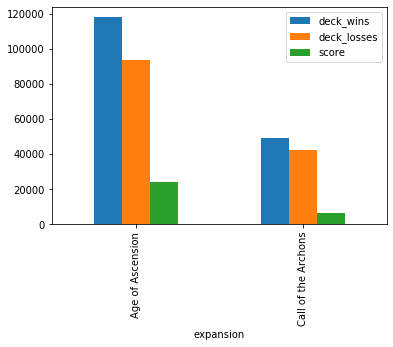

In [12]:
my_plot = deck_exp_totals.plot(kind='bar')

In [13]:
deck_df.head()

,Unnamed: 0,deck_id,deck_name,deck_wins,deck_losses,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zysysyx Shockworm,Zyzzix the Many,[REDACTED],Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion
0,0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,True,True,True,False,False,...,False,False,True,False,False,False,False,False,1,Call of the Archons
1,1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,True,False,True,False,True,...,False,False,True,False,False,False,False,False,-2,Call of the Archons
2,2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,True,False,True,True,False,...,False,False,True,False,False,False,False,True,1,Call of the Archons
3,3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,False,False,True,False,True,...,False,False,True,False,False,False,False,False,0,Call of the Archons
4,4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,False,False,False,True,True,...,False,True,True,False,False,False,True,False,4,Age of Ascension


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf=RandomForestClassifier(n_estimators=100)

In [17]:
x = deck_df
x = x.drop("deck_id", axis=1)
x = x.drop("deck_name", axis=1)
x = x.drop("deck_wins", axis=1)
x = x.drop("deck_losses", axis=1)
x = x.drop("score", axis=1)
x = x.drop("expansion", axis=1)
y = deck_df[['score']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [19]:
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred=clf.predict(x_test)

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18727718360071302


In [22]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Unnamed: 0               0.028567
Mother                   0.005034
Charette                 0.004691
Labwork                  0.004686
Dust Imp                 0.004561
Lash of Broken Dreams    0.004496
Wild Wormhole            0.004440
Shooler                  0.004392
Miasma                   0.004279
Punch                    0.004239
Titan Mechanic           0.004236
Umbra                    0.004102
Blinding Light           0.004079
Bad Penny                0.004066
Library of Babble        0.004029
Full Moon                0.003998
Key Charge               0.003950
Regrowth                 0.003947
Nerve Blast              0.003926
Ganger Chieftain         0.003872
Protect the Weak         0.003853
Take Hostages            0.003811
Gauntlet of Command      0.003789
Shield of Justice        0.003774
Tremor                   0.003597
Coward’s End             0.003508
Save the Pack            0.003414
Mindwarper               0.003360
Control the Weak         0.003318
Arise!        

---------

In [241]:
x = deck_df[['house_brobnar','house_dis','house_sanctum','house_mars','house_untamed','house_shadows', 'house_logos']]
y = deck_df[['score']]

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [243]:
y_pred=clf.predict(x_test)

In [244]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.19758244206773617


In [245]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows    0.390634
house_mars       0.154584
house_dis        0.099420
house_logos      0.092508
house_untamed    0.092004
house_sanctum    0.085797
house_brobnar    0.085054
dtype: float64